In [3]:
!pip3 install wget


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=c8c1a027fe9a82ffc365873836ef3939699eafde220bb6f82e739b74133b2a37
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [4]:
import wget

In [5]:
import matplotlib.pyplot as plt


In [6]:
import cv2

In [7]:
wget.download('https://cpimg.tistatic.com/05265666/b/4/Digital-Vitrified-Parking-Tiles.jpg')

'Digital-Vitrified-Parking-Tiles.jpg'

In [10]:
image = cv2.imread('Digital-Vitrified-Parking-Tiles.jpg')

In [11]:
# chuyển qua loại anh xám
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

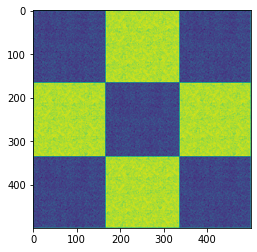

In [12]:

plt.imshow(grey_img)

In [13]:
# ảnh xám thì chỉ có 2 chiều
grey_img.shape

(500, 500)

In [14]:
grey_img

array([[174, 153, 175, ..., 170, 160, 184],
       [168, 112, 111, ..., 108, 116, 160],
       [175, 109, 107, ..., 108, 119, 167],
       ...,
       [169, 107, 102, ..., 106,  99, 171],
       [157, 115, 114, ..., 112, 110, 167],
       [181, 162, 170, ..., 168, 157, 181]], dtype=uint8)

In [15]:
sobelX = [[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]]
sobelY = [[1, 2, 1],[0, 0, 0], [-1, -2, -1]]

In [16]:
def getCoord(kernel):
  # kenrel là tọa độ 3x3 thì trung tâm của nó là (1,1)
  center_filter = [1,1]
  # độ chênh lệch của các vị trí xung quanh so với cái center này 
  # ví dụ x = 0 ; y = -1  => x giữ nguyên và y giảm 1 => vị trí mới của nó là bên trái (1,1)
  # ví dụ x = 0 ; y = 1 => x giữ nguyên và y tăng 1 => vị trí của nó là bên phải (1,1)
  xRows = [0,0,1,-1,1,-1,1,-1]
  yCols = [-1,1,0,0,-1,-1,1,1]
  for k in range(8):
    pixel_in_filter_x = center_filter[0] + xRows[k]
    pixel_in_filter_y = center_filter[1] + yCols[k]
    print('pixel_in_filter_x', pixel_in_filter_x)
    print('pixel_in_filter_y', pixel_in_filter_y)
    print('kernel pixel filter x', kernel[pixel_in_filter_x][pixel_in_filter_y])

In [17]:
# lấy ra 8 điểm xung quanh
getCoord(sobelX) 

pixel_in_filter_x 1
pixel_in_filter_y 0
kernel pixel filter x -2
pixel_in_filter_x 1
pixel_in_filter_y 2
kernel pixel filter x 2
pixel_in_filter_x 2
pixel_in_filter_y 1
kernel pixel filter x 0
pixel_in_filter_x 0
pixel_in_filter_y 1
kernel pixel filter x 0
pixel_in_filter_x 2
pixel_in_filter_y 0
kernel pixel filter x -1
pixel_in_filter_x 0
pixel_in_filter_y 0
kernel pixel filter x -1
pixel_in_filter_x 2
pixel_in_filter_y 2
kernel pixel filter x 1
pixel_in_filter_x 0
pixel_in_filter_y 2
kernel pixel filter x 1


In [18]:
import numpy as np

In [19]:
def conv(grey_img, kernel):
  transformed = np.copy(grey_img)
  m = transformed.shape[0]
  n = transformed.shape[1]
  print(m , n)
  centerFilter = [1 ,1]
  xRows = [0,0,1,-1,1,-1,1,-1]
  yCols = [-1,1,0,0,-1,-1,1,1]
  for i in range(1, m -1):
    for j in range(1, n-1):
      centerPixel = [i, j]
      newVal = 0.0
      for k in range(8):
        item = [xRows[k], yCols[k]]
        pixel_in_img_x = centerPixel[0] + item[0]
        pixel_in_img_y = centerPixel[1] + item[1]
        pixel_in_filter_x = centerFilter[0] + item[0]
        pixel_in_filter_y = centerFilter[1] + item[1]
        newVal = newVal + kernel[pixel_in_filter_x][pixel_in_filter_y] * grey_img[pixel_in_img_x, pixel_in_img_y]
      newVal = newVal + kernel[1][1] * grey_img[i, j]
      if newVal < 0:
        newVal = 0
      if newVal > 255:
        newVal = 255
    # trong trường hợp cái ảnh mờ quá thì chúng ta tăng lên 2 or 3
    # cứ tính ra 1 cái pixel thì chúng ta gán luôn vào cái vị trí đó, như vậy có đúng với mọi ảnh hay ko ?
    # trả lời là không đúng
    # bài này khoảng cách trượt là bằng 1, padding không có nên có thể gán luôn
      transformed[i, j] = newVal * 1
  return transformed

In [20]:
result1 = conv(grey_img, sobelX)

500 500


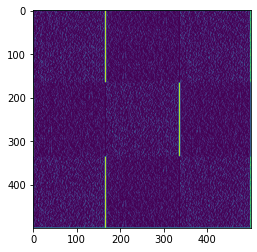

In [21]:
plt.imshow(result1)

In [22]:
result2 = conv(grey_img, sobelY)


500 500


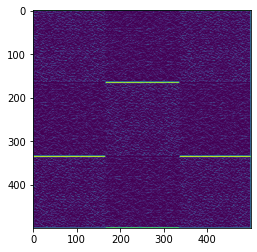

In [23]:
plt.imshow(result2)

In [36]:
import sys

In [54]:
def maxpool(image):
  # m là chiều cao
  # n là chiều rộng
  m = len(image)
  n = len(image[0])
  # tạo 1 cái mảng là 1 cái ảnh mới sau khi max_pooling thì  cái ảnh mới chiều cao, rộng bằng 1 nữa cái ảnh ban đầu
  # tại sao +1 do làm tròn xuống dưới thì phải cộng 1 vào để tí nữa gán vào mảng khỏi bị chuyện out-of-indexing
  new_image =  np.zeros((m//2 + 1, n//2 + 1))
  xRows = [1,1,0]
  yCols = [0 ,1,1]
  for i in range(0, m, 2):
    for j in range(0, n , 2):
      current_pixel = [image[i][j]]
      for k in range(3):
        neighbor_x = i+xRows[k]
        neighbor_y = j+yCols[k]
        if neighbor_x < m and neighbor_y < n:
          current_pixel.append(image[neighbor_x][neighbor_y])
      # do đã cộng 1 ở trên nên ở đây nếu lấy cận dưới thì trong mọi trường hợp không thể out-of-indexing
      new_image[i//2][j//2] = max(current_pixel)
  return new_image


In [54]:
result3 = maxpool(result1)

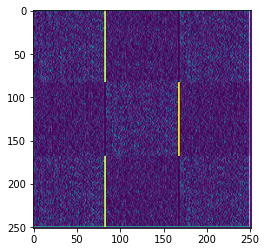

In [55]:
plt.imshow(result3)

In [56]:
result4 = maxpool(result2)

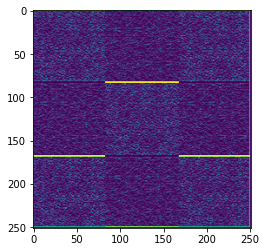

In [57]:
plt.imshow(result4)